#SALES DATA - BUSINESS ANALYSIS


##  Problem Statement

The objective of this analysis is to understand: <br>
 -  Superstore's sales performance
- Identify loss-making areas
- Provide data-driven recommendations to improve
profitability and efficiency
- Identifying trends over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('/content/Superstore_FullyCleaned.csv')

print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  12-06-2016  16-06-2016    Second Class    DV-13045   
3       4  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   
4       5  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Quantity  \
0      Claire Gute   Consumer  United States        Henderson  ...      2.0   
1      Claire Gute   Consumer  United States        Henderson  ...      3.0   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...      2.0   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...      5.0   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...      2.0   

   Discount    Profit Shipping_Days Or

##  Dataset Overview
The dataset contains order-level sales data including product details,
customer segments, regions, discounts, and profit.


In [8]:
df.shape


(9994, 28)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             9994 non-null   int64  
 1   Order ID           9994 non-null   object 
 2   Order Date         9994 non-null   object 
 3   Ship Date          9994 non-null   object 
 4   Ship Mode          9994 non-null   object 
 5   Customer ID        9994 non-null   object 
 6   Customer Name      9994 non-null   object 
 7   Segment            9994 non-null   object 
 8   Country            9994 non-null   object 
 9   City               9994 non-null   object 
 10  State              9994 non-null   object 
 11  Postal Code        9994 non-null   int64  
 12  Region             9994 non-null   object 
 13  Product ID         9994 non-null   object 
 14  Category           9994 non-null   object 
 15  Sub-Category       9994 non-null   object 
 16  Product Name       9994 

In [13]:
category_profit = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit')
category_profit


,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


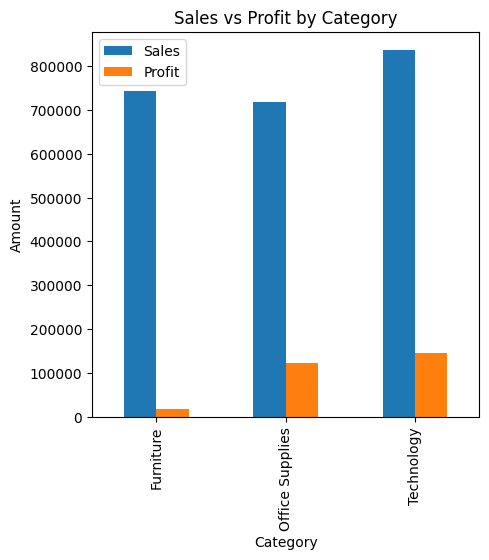

In [12]:
category_profit.plot(kind='bar', figsize=(5,5))
plt.title('Sales vs Profit by Category')
plt.ylabel('Amount')
plt.show()


Furniture generates high sales but comparatively low profit,
indicating margin or discount-related issues. <br>
<br>
Better investment returns from TECHNOLOGY AND OFFICE SUPPLIES


In [11]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit.head(10)

,Profit
Sub-Category,
Tables,-8748.5211
Machines,-6011.6484
Bookcases,-1969.4721
Supplies,-675.9688
Fasteners,416.8182
Labels,2297.4618
Art,2554.1797
Envelopes,2597.6943
Furnishings,5342.1102


In [16]:
total_losses = subcat_profit[subcat_profit < 0].sum()
print(total_losses)

-17405.610399999998


Total loss

In [30]:
df[['Category','Sub-Category']].drop_duplicates().sort_values(by='Category')

,Category,Sub-Category
0,Furniture,Bookcases
1,Furniture,Chairs
3,Furniture,Tables
5,Furniture,Furnishings
138,Office Supplies,Supplies
53,Office Supplies,Fasteners
30,Office Supplies,Envelopes
12,Office Supplies,Paper
9,Office Supplies,Appliances
8,Office Supplies,Binders


Sub-categories like Tables and Bookcases are loss-making
despite significant sales volume.


In [24]:
# total losses per product
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=True)
product_profit.head(10)

,Profit
Product Name,
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
Cubify CubeX 3D Printer Double Head Print,-2639.9912
"Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish",-1982.2050
Cisco TelePresence System EX90 Videoconferencing Unit,-1811.0784
GBC DocuBind P400 Electric Binding System,-1742.0672
Bush Advantage Collection Racetrack Conference Table,-1281.1142
Martin Yale Chadless Opener Electric Letter Opener,-1082.6530
Cisco 9971 IP Video Phone Charcoal,-950.4000


Just 5 products are responsible for more than 50% of the total losses, meaning a small number of items cause most of the damage.

In [26]:
# PROFIT MARGIN %
overall_profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100
print(overall_profit_margin)

10.34612584868352


Overall, the business earns only about 10% profit on its total sales, which is quite low.

In [33]:
segment_profit = df.groupby('Segment')[['Profit','Discount']].sum()
print(segment_profit)

                 Profit  Discount
Segment                          
Consumer     47879.2161    329.70
Corporate    26984.2408    184.56
Home Office  21309.4872    111.74


In [31]:
discount_analysis = df.groupby('Discount')[['Sales','Profit']].mean()
discount_analysis


,Sales,Profit
Discount,,
0.00,226.742074,66.900292
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.076940,24.702572
0.30,454.742974,-45.679636
0.32,536.794770,-88.560656
0.40,565.134874,-111.927429
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456


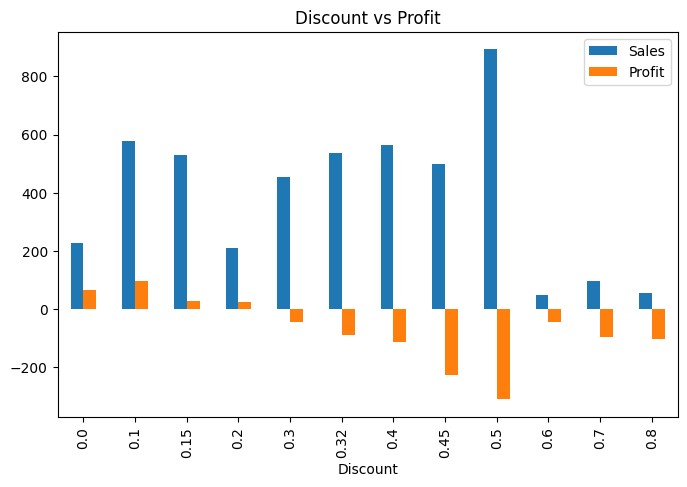

In [33]:
discount_analysis.plot(kind='bar',figsize=(8,5))
plt.title('Discount vs Profit')
plt.show()


Discounts above 20% leads to negative average profit,
indicating aggressive discounting hurts profitability.


In [36]:
segment_profit = df.groupby('Segment')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=True)
segment_profit


,Sales,Profit
Segment,,
Home Office,4.296531e+05,60298.6785
Corporate,7.061464e+05,91979.1340
Consumer,1.161401e+06,134119.2092


Corporate segment contributes the highest profit per order
and should be prioritized for retention strategies.


In [ ]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region_profit


Certain regions consistently underperform and require pricing
or logistics optimization.


In [ ]:
ship_profit = df.groupby('Ship Mode')['Profit'].mean()
ship_profit


Same Day shipping shows lower profit margins,
suggesting higher operational costs.


In [39]:
monthly_trend = df.groupby('Order_Month')[['Sales', 'Profit']].sum().reset_index()
monthly_trend['Order_Month'] = monthly_trend['Order_Month'].astype(str)

monthly_trend.head(12)

,Order_Month,Sales,Profit
0,1,94924.8356,9134.4461
1,2,59751.2514,10294.6107
2,3,205005.4888,28594.6872
3,4,137762.1286,11587.4363
4,5,155028.8117,22411.3078
5,6,152718.6793,21285.7954
6,7,147238.0970,13832.6648
7,8,159044.0630,21776.9384
8,9,307649.9457,36857.4753
9,10,200322.9847,31784.0413


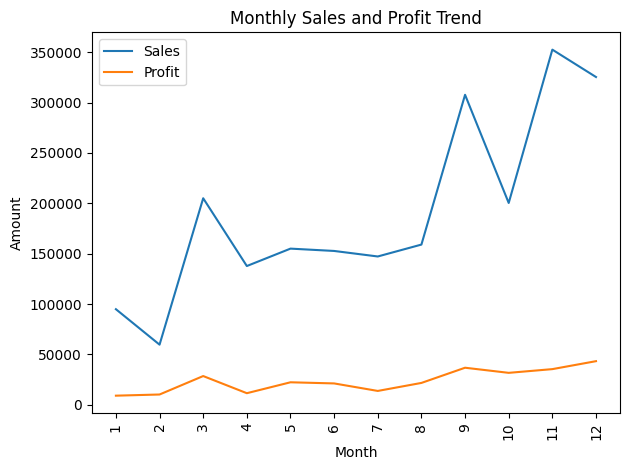

In [41]:
plt.plot(monthly_trend['Order_Month'], monthly_trend['Sales'], label='Sales')
plt.plot(monthly_trend['Order_Month'], monthly_trend['Profit'], label='Profit')

plt.title('Monthly Sales and Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


While sales show a generally increasing trend over time, profit fluctuates significantly, indicating that higher sales volumes do not consistently translate into higher profitability.

In [43]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {profit_margin:.2f}%")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%


Despite strong total sales, the overall profit margin remains relatively low, suggesting inefficiencies driven by discounting and operational costs.

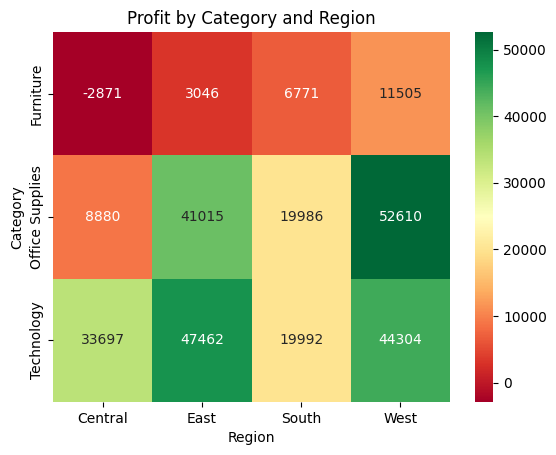

In [44]:
pivot_profit = pd.pivot_table(df,values='Profit',index='Category',columns='Region',aggfunc='sum')

sns.heatmap(pivot_profit, annot=True, fmt='.0f', cmap='RdYlGn')
plt.title("Profit by Category and Region")
plt.show()


Profitability varies significantly across regions and categories, highlighting opportunities for region-specific pricing and category-level optimization strategies.

In [46]:
customer_profit = (
    df.groupby('Customer Name')['Profit']
    .sum()
    .sort_values(ascending=False)
)

customer_profit.describe()


,Profit
count,793.000000
mean,361.156396
std,894.261812
min,-6626.389500
25%,36.613100
50%,227.833800
75%,560.007800
max,8981.323900


A limited group of high-value customers contributes a majority of total profit, reinforcing the importance of retention strategies for top-performing customers.

In [7]:
monthly_profit = df.groupby('Order_Month')['Profit'].sum()
monthly_profit.std()


4317.155494366126

High standard deviation indicates profit instability, often driven by discounts and loss-making products.



In [9]:
yoy_trend = df.groupby('Order_Year')[['Sales','Profit']].sum()
yoy_trend

,Sales,Profit
Order_Year,,
2014.0,230299.0174,15887.2992
2015.0,192274.0852,23241.7251
2016.0,217313.4839,25337.5297
2017.0,289668.5485,31706.3901


Sales and profit show a clear upward YoY growth, indicating business expansion and improved market penetration.